In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
trainhr=pd.read_csv('/content/train.csv')

In [ ]:
testhr=pd.read_csv('/content/test.csv')

In [ ]:
print(trainhr.shape)
print(testhr.shape)

In [ ]:
trainhr.head()

In [ ]:
testhr.head()

In [ ]:
trainhr.info()

In [ ]:
testhr.info()

In [ ]:
testhr.describe().T

In [ ]:
trainhr.describe().T

In [ ]:
trainhr.isnull().sum()

In [ ]:
#testhr.isnull().any()
testhr.isnull().sum()/len(testhr)

In [ ]:
testhr['is_promoted']='test'

In [ ]:
combineddf=pd.concat([trainhr,testhr],axis=0)
#axis 0 for row
#axis 1 for column

In [ ]:
combineddf.isnull().sum()

In [ ]:
combineddf.education.value_counts(dropna=False)

In [ ]:
combineddf.education.fillna("Bachelor's",inplace=True)

In [ ]:
combineddf.previous_year_rating.value_counts(dropna=False)

In [ ]:
combineddf.previous_year_rating.mean()

In [ ]:
combineddf.previous_year_rating.median()

In [ ]:
combineddf.previous_year_rating.fillna(3.0,inplace=True)

In [ ]:
combineddf.isnull().any()

In [ ]:
combineddf.no_of_trainings=combineddf.no_of_trainings.astype('object')

In [ ]:
combineddf.previous_year_rating=combineddf.previous_year_rating.astype('object')

In [ ]:
combineddf['KPIs_met >80%']=combineddf['KPIs_met >80%'].astype('object')

In [ ]:
combineddf['awards_won?']=combineddf['awards_won?'].astype('object')

In [ ]:
combineddf=combineddf.drop('employee_id',axis=1)

In [ ]:
numcols=combineddf.select_dtypes(include=np.number)
objcols=combineddf.select_dtypes(include=['object'])

In [ ]:
numcols.head()

In [ ]:
objcols.head()

In [ ]:
numcols.columns

In [ ]:
objcols.columns

In [ ]:
trainhr.is_promoted.value_counts().plot(kind='pie',autopct='%0.2f%%')

In [ ]:
#plotting a scatter plot
plt.hist(trainhr.is_promoted)
plt.title('plot to show the gap in Promoted and Non-Promoted Employees', fontsize = 30)
plt.xlabel('0 -No Promotion and 1- Promotion', fontsize = 20)
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [ ]:
trainhr.gender.value_counts()

In [ ]:
trainhr.gender.value_counts().plot(kind='pie',autopct='%0.2f%%')

In [ ]:
#plotting a scatter plot
plt.hist(trainhr.gender)
plt.title('plot to show the gap between male and female', fontsize = 30)
plt.xlabel('f=FEMALE and m=MALE', fontsize = 20)
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [ ]:
trainhr.previous_year_rating.value_counts().plot(kind='pie',autopct='%0.2f%%')

In [ ]:
#plotting a scatter plot

plt.hist(trainhr.previous_year_rating,color='orange')
plt.title('plot to show the previous year rating', fontsize = 20)
plt.xlabel('rating', fontsize = 10)
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [ ]:
trainhr['awards_won?'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [ ]:
#plotting a scatter plot
plt.hist(trainhr['awards_won?'],color='red')
plt.title('plot to show the awards won', fontsize = 20)
plt.xlabel('0=Awards Won and 1=NO Awards Won', fontsize = 10)
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [ ]:
trainhr['KPIs_met >80%'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [ ]:
#plotting a scatter plot
plt.hist(trainhr['KPIs_met >80%'],color='green')
plt.title('plot to show the KPIs Met >80%', fontsize = 20)
plt.xlabel('0=Not Met KPI > 80% and 1=Met KPI > 80%', fontsize = 10)
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [ ]:
# checking the distribution of length of service
sns.histplot(trainhr['length_of_service'], color = 'green')
plt.title('Distribution of length of service among the Employees', fontsize = 20)
plt.xlabel('Length of Service in years', fontsize = 15)
plt.ylabel('count')
plt.show()

In [ ]:
# checking the distribution of age of Employees in the company
sns.histplot(trainhr['age'], color = 'red')
plt.title('Distribution of Age of Employees', fontsize = 30)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('count')
plt.show()

In [ ]:
#plotting a scatter plot
plt.hist(trainhr['recruitment_channel'])
plt.title('Showing share of different Recruitment Channels', fontsize = 20)
plt.xlabel('Others, Sourcing, Refered', fontsize = 10)
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [ ]:
trainhr['region'].value_counts().sort_values(ascending=False).plot(kind='bar',color='green')

### Scaling the numeric columns

In [ ]:
#standard scaler
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
numcols_scaled=scaler.fit_transform(numcols)

In [ ]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [ ]:
numcols_scaled.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax=MinMaxScaler()

In [ ]:
numcols_minmax=minmax.fit_transform(numcols)

In [ ]:
numcols_minmax=pd.DataFrame(numcols_minmax,columns=numcols.columns)

In [ ]:
numcols_minmax.head()

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
robust=RobustScaler()

In [ ]:
numcols_robust=robust.fit_transform(numcols)

In [ ]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [ ]:
numcols_robust.head()

Dummy encoding

In [ ]:
objcols.columns

In [ ]:
objcols_dummy=pd.get_dummies(objcols,columns=['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?'])

In [ ]:
objcols_dummy.head()

In [ ]:
combinedf_clean=pd.concat([numcols_minmax.reset_index(),objcols_dummy.reset_index()],axis=1)

In [ ]:
combinedf_clean.head()

In [ ]:
combinedf_clean.drop(['index'],axis=1,inplace=True)

In [ ]:
#split data back to train and test
trainhr_df=combinedf_clean[combinedf_clean.is_promoted!='test']
testhr_df=combinedf_clean[combinedf_clean.is_promoted=='test']

In [ ]:
#split data back to train and test for EDA Hypothesis testing as this dataset doesn't have scaled numerical variables
#and dummies in categorical columns.
trainhr_EDA=combineddf[combineddf.is_promoted!='test']
testhr_EDA=combineddf[combineddf.is_promoted=='test']

In [ ]:
pd.crosstab(trainhr_EDA.is_promoted,trainhr_EDA.recruitment_channel)

**There is a significant number of promotions came from the "sourcing" channel.**

In [ ]:
pd.crosstab(trainhr_EDA.is_promoted,trainhr_EDA['KPIs_met >80%'])

**Again Having a good KPI score increases the chances of getting promoted in the company.**

In [ ]:
pd.crosstab(trainhr_EDA.is_promoted,trainhr_EDA['awards_won?'])

**There is a very good chance of getting promoted if the employee has won an award**

In [ ]:
pd.crosstab(trainhr_EDA.age, trainhr_EDA['is_promoted'])

**This is Very Impressive that the company promotes employees of all the ages equally even the freshers have equal share of promotion and also the senior citizen employees are getting the equal share of Promotion in the Company**

In [ ]:
pd.crosstab(trainhr_EDA.department,trainhr_EDA['is_promoted'])

**Again, Each of the departments have equal no. of promotions showing an equal development in each of the departments of the company.**

In [ ]:
pd.crosstab(trainhr_EDA.gender,trainhr_EDA['is_promoted'])

**The above plot shows that there is no partiality between males and females in terms of promotion**

In [ ]:
#GROUPBY

In [ ]:
trainhr_EDA.avg_training_score.groupby(trainhr_EDA.is_promoted).mean()

In [ ]:
trainhr_EDA.length_of_service.groupby(trainhr_EDA.is_promoted).mean()

In [ ]:
trainhr_EDA.age.groupby(trainhr_EDA.is_promoted).mean()

In [ ]:
#performing hypothesis testing using T-Test
one=trainhr_EDA[trainhr_EDA.is_promoted==1]
zero=trainhr_EDA[trainhr_EDA.is_promoted==0]

In [ ]:
#Null hypothesis - There is no significant difference between the two given variables. (p-values greater than 0.05)

#Alternative Hypothesis - There is significant difference between the two given variables.(p-values less than 0.05)

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(one.avg_training_score,zero.avg_training_score,equal_var=False)
#since pvalue=7.662329172468838e-291 is lessthan 0.05,reject null

In [ ]:
ttest_ind(one.length_of_service,zero.length_of_service,equal_var=False)
#since pvalue=0.008262946987836755 is lessthan 0.05,reject null

In [ ]:
trainhr_EDA.avg_training_score.groupby(trainhr_EDA.previous_year_rating).mean()

In [ ]:
ones=trainhr_EDA[trainhr_EDA.previous_year_rating==1.0]
two=trainhr_EDA[trainhr_EDA.previous_year_rating==2.0]
three=trainhr_EDA[trainhr_EDA.previous_year_rating==3.0]
four=trainhr_EDA[trainhr_EDA.previous_year_rating==4.0]
five=trainhr_EDA[trainhr_EDA.previous_year_rating==5.0]

In [ ]:
from scipy.stats import f_oneway
f_oneway(ones.avg_training_score,two.avg_training_score,three.avg_training_score,four.avg_training_score,five.avg_training_score)
#since pvalue=6.957044805766572e-114) is lessthan 0.05,reject null

In [ ]:
f_oneway(ones.length_of_service,two.length_of_service,three.length_of_service,four.length_of_service,five.length_of_service)
#since pvalue=2.89045896511553e-124 is lessthan 0.05,reject null

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(trainhr.is_promoted,trainhr.gender))
#since pvalue=0.009765091521176657 is lessthan 0.05,reject null

In [ ]:
chi2_contingency(pd.crosstab(trainhr['KPIs_met >80%'],trainhr.is_promoted))
#since pvalue=0.0 is lessthan 0.05,reject null

In [ ]:
chi2_contingency(pd.crosstab(trainhr.is_promoted,trainhr['awards_won?']))
#since pvalue=0.0 is lessthan 0.05,reject null

In [ ]:
print(trainhr_EDA.shape)
print(testhr_EDA.shape)

In [ ]:
y=trainhr_df.is_promoted
X=trainhr_df.drop('is_promoted',axis=1)
testhr_df=testhr_df.drop('is_promoted',axis=1)

In [ ]:
X.head()

In [ ]:
# we using the labelencoder for dependent variable(y), to change dependent variable to 0's and 1's
from sklearn.preprocessing import LabelEncoder

In [ ]:
y=LabelEncoder().fit_transform(y)

In [ ]:
trainhr_df.is_promoted.value_counts().plot(kind='bar')

In [ ]:
 # importing the smote as the data is been oversampled
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y = oversample.fit_resample(X, y)

# Logistice Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit=LogisticRegression(max_iter=5000)

In [ ]:
logitmodel=logit.fit(X,y)

In [ ]:
logitmodel.score(X,y)

In [ ]:
logitpredict=logitmodel.predict(X)

In [ ]:
pd.crosstab(y,logitpredict)

In [ ]:
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [ ]:
print(classification_report(y,logitpredict))

In [ ]:
RocCurveDisplay.from_predictions(y,logitpredict)

In [ ]:
cross_val_score(logit,X,y)

In [ ]:
np.mean([0.79741723, 0.91663343, 0.918927  , 0.91852812, 0.91912645])

In [ ]:
logittest=logitmodel.predict(testhr_df)

In [ ]:
pd.DataFrame(logittest).to_csv("Logit1.csv")

# Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree=DecisionTreeClassifier(max_depth=10)

In [ ]:
treemodel=tree.fit(X,y)

In [ ]:
treemodel.score(X,y)

In [ ]:
treepredict=treemodel.predict(X)

In [ ]:
pd.crosstab(y,treepredict)

In [ ]:
print(classification_report(y,treepredict))

In [ ]:
RocCurveDisplay.from_predictions(y,treepredict)

In [ ]:
cross_val_score(tree,X,y)

In [ ]:
np.mean([0.81367172, 0.87958716, 0.8718588 , 0.8723574 , 0.87345433])

In [ ]:
treetest=treemodel.predict(testhr_df)

In [ ]:
pd.DataFrame(treetest).to_csv('tree1.csv')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF=RandomForestClassifier(max_depth=5,n_estimators=500)

In [ ]:
RFmodel=RF.fit(X,y)

In [ ]:
RFmodel.score(X,y)

In [ ]:
Ranpredict=RFmodel.predict(X)

In [ ]:
pd.crosstab(y,Ranpredict)

In [ ]:
print(classification_report(y,Ranpredict))

In [ ]:
RocCurveDisplay.from_predictions(y,Ranpredict)

In [ ]:
cross_val_score(RF,X,y)

In [ ]:
np.mean([0.76042082, 0.76695253, 0.75822696, 0.767501  , 0.76839848])

In [ ]:
RFpredict=RFmodel.predict(testhr_df)

In [ ]:
pd.DataFrame(RFpredict).to_csv('RF1.csv')

# Gradient Boosting Machine

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier(max_depth=4,n_estimators=300)

In [ ]:
gbcmodel=gbc.fit(X,y)

In [ ]:
gbcmodel.score(X,y)

In [ ]:
gbcpredict=gbcmodel.predict(X)

In [ ]:
pd.crosstab(y,gbcpredict)

In [ ]:
print(classification_report(y,gbcpredict))

In [ ]:
RocCurveDisplay.from_predictions(y,gbcpredict)

In [ ]:
cross_val_score(gbc,X,y)

In [ ]:
np.mean([0.8394994 , 0.96808935, 0.97402274, 0.97521939, 0.97252692])

In [ ]:
gbcpredict=gbcmodel.predict(testhr_df)

In [ ]:
pd.DataFrame(gbcpredict).to_csv('gbc1.csv')

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mul=MultinomialNB()

In [ ]:
mulmodel=mul.fit(X,y)

In [ ]:
mulmodel.score(X,y)

In [ ]:
mulpredict=mulmodel.predict(X)

In [ ]:
pd.crosstab(y,mulpredict)

In [ ]:
print(classification_report(y,mulpredict))

In [ ]:
RocCurveDisplay.from_predictions(y,mulpredict)

In [ ]:
cross_val_score(mul,X,y)

In [ ]:
np.mean([0.74217192, 0.76854807, 0.76386119, 0.77143997, 0.77059234])

In [ ]:
mulpredict=mulmodel.predict(testhr_df)

In [ ]:
pd.DataFrame(mulpredict).to_csv('mul1.csv')

## Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nbg=GaussianNB()

In [ ]:
nbgmodel=nbg.fit(X,y)

In [ ]:
nbgmodel.score(X,y)

In [ ]:
nbgpredict=nbgmodel.predict(X)

In [ ]:
pd.crosstab(y,nbgpredict)

In [ ]:
print(classification_report(y,nbgpredict))

In [ ]:
RocCurveDisplay.from_predictions(y,nbgpredict)

In [ ]:
cross_val_score(nbg,X,y)

In [ ]:
np.mean([0.62086159, 0.66229557, 0.66563622, 0.66169725, 0.66070004])

In [ ]:
nbgpredict=nbgmodel.predict(testhr_df)

In [ ]:
pd.DataFrame(nbgpredict).to_csv('ngb1.csv')

## Bernoulli's

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
bb=BernoulliNB()

In [ ]:
bbmodel=bb.fit(X,y)

In [ ]:
bbmodel.score(X,y)

In [ ]:
bbpredict=bbmodel.predict(X)

In [ ]:
pd.crosstab(y,bbpredict)

In [ ]:
print(classification_report(y,bbpredict))

In [ ]:
RocCurveDisplay.from_predictions(y,bbpredict)

In [ ]:
cross_val_score(bb,X,y)

In [ ]:
np.mean([0.73105305, 0.74406661, 0.74097527, 0.75054846, 0.7497507 ])

In [ ]:
bbpredict=bbmodel.predict(testhr_df)

In [ ]:
pd.DataFrame(bbpredict).to_csv('bb1.csv')

# SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(C=3)

In [ ]:
svcmodel=svc.fit(X,y)

In [ ]:
svcmodel.score(X,y)

In [ ]:
svcpredict=svcmodel.predict(X)

In [ ]:
pd.crosstab(y,svcpredict)

In [ ]:
print(classification_report(y,svcpredict))

In [ ]:
RocCurveDisplay.from_predictions(y,svcpredict)

In [ ]:
cross_val_score(svc,X,y)

In [ ]:
np.mean([0.82977663, 0.9486438 , 0.9512864 , 0.95243319, 0.94934184])

In [ ]:
svcpredict=svcmodel.predict(testhr_df)

In [ ]:
pd.DataFrame(svcpredict).to_csv('svc1.csv')

# Validating the Score in analytics vidya

![Screenshot 2023-11-08 235847.png](<attachment:Screenshot 2023-11-08 235847.png>)
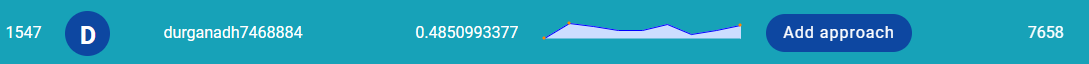

![Screenshot 2023-11-08 235936.png](<attachment:Screenshot 2023-11-08 235936.png>)
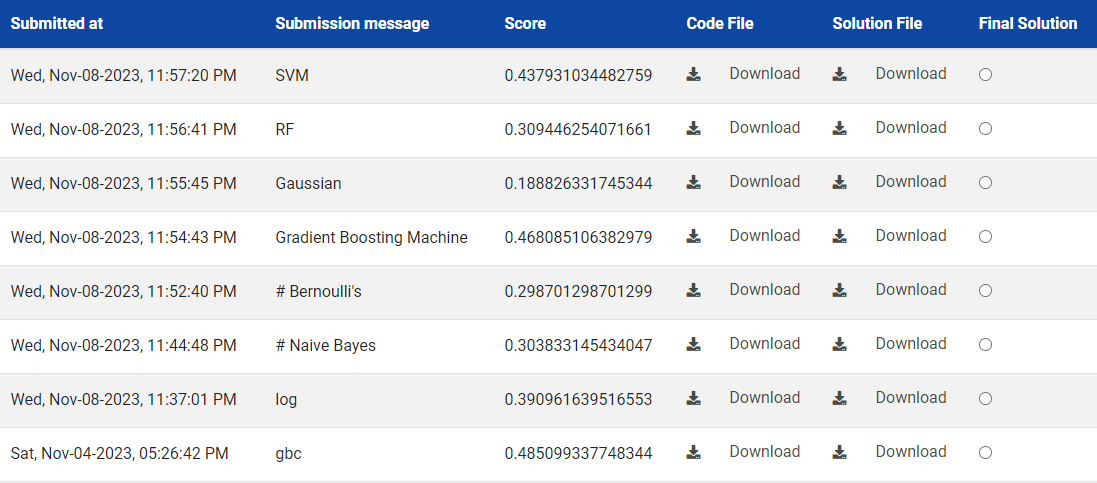